In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [7]:
insurance_dataset= pd.read_csv('insurance/insurance.csv')

In [9]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [13]:
#getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
#categorical features= sex,smoker,region
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
#data analysis
#statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipykernel_150/2889789378.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


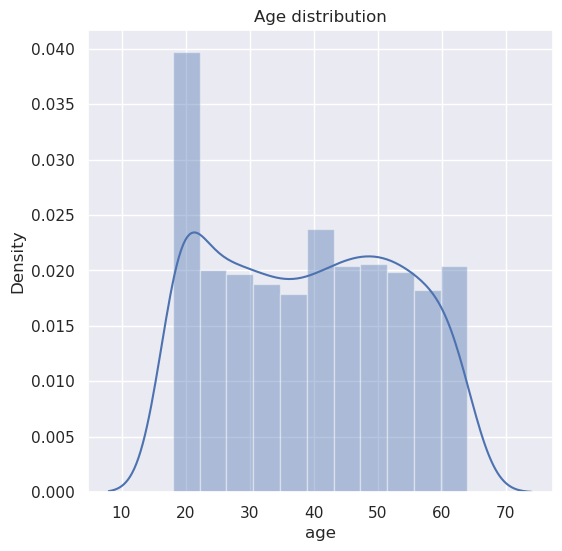

In [21]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()

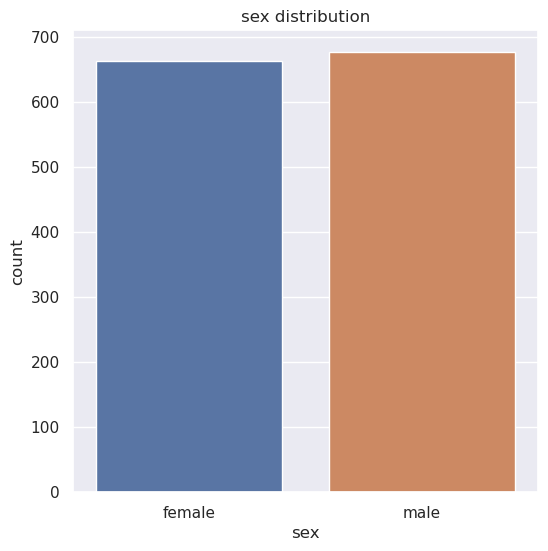

In [23]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('sex distribution')
plt.show()

In [25]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x600 with 0 Axes>

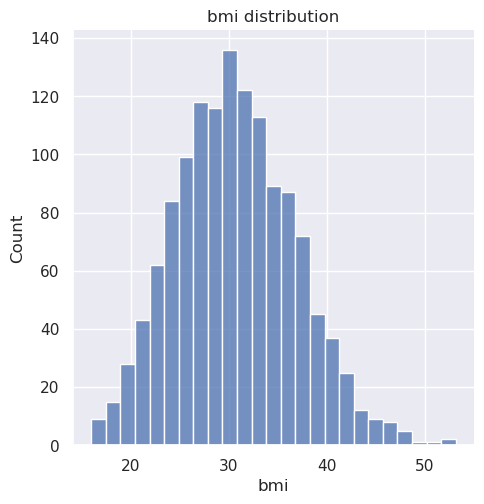

In [39]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('bmi distribution')
plt.show()

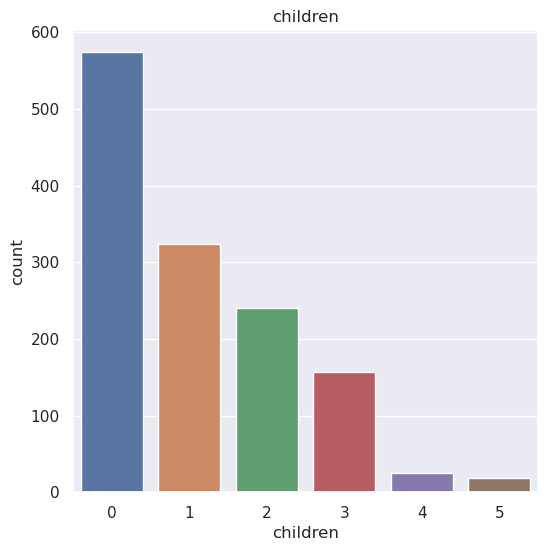

In [37]:
#NORMAL BMI RANGE 18.8 TO 24.9
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children')
plt.show()

In [41]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

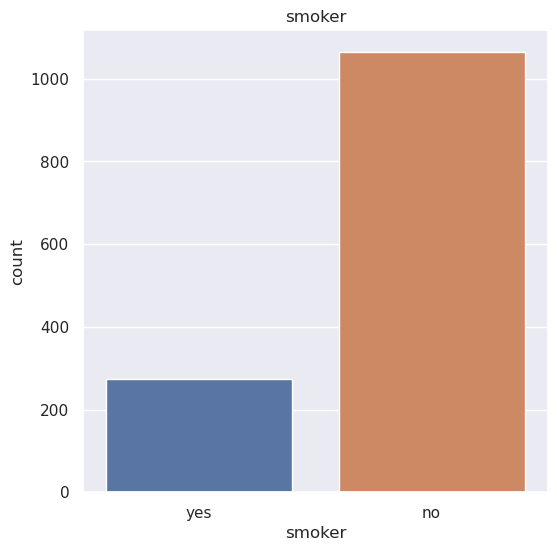

In [43]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker')
plt.show()

In [49]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

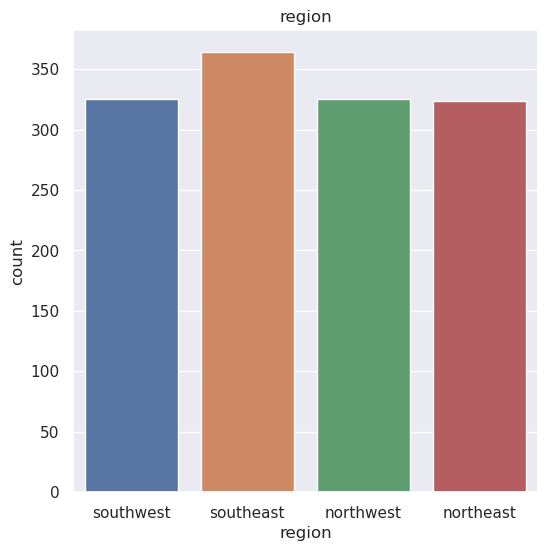

In [51]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region')
plt.show()




In [53]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

/tmp/ipykernel_149/2019590914.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])  # Using Seaborn to create the distribution plot
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


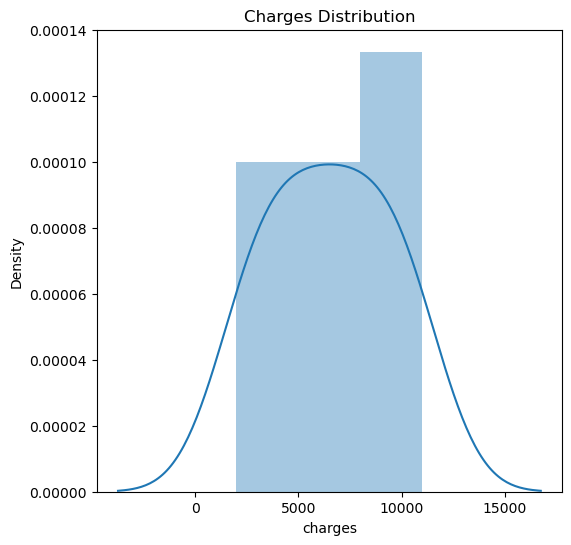

In [121]:
#distribution of charges value
import matplotlib.pyplot as plt
import seaborn as sns  # Importing the Seaborn library
import pandas as pd

plt.figure(figsize=(6, 6))
data = {
    'charges': [2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000]
}
insurance_dataset = pd.DataFrame(data)
sns.distplot(insurance_dataset['charges'])  # Using Seaborn to create the distribution plot
plt.title('Charges Distribution')
plt.show()

In [123]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding region column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2,'northwest':3}},inplace=True)

In [71]:
X=insurance_dataset.drop(columns='charges', axis=1)
Y=insurance_dataset['charges']

In [77]:
print(X)

      age  sex     bmi  children  smoker     region
0      19    1  27.900         0       0  southwest
1      18    0  33.770         1       1  southeast
2      28    0  33.000         3       1  southeast
3      33    0  22.705         0       1  northwest
4      32    0  28.880         0       1  northwest
...   ...  ...     ...       ...     ...        ...
1333   50    0  30.970         3       1  northwest
1334   18    1  31.920         0       1  northeast
1335   18    1  36.850         0       1  southeast
1336   21    1  25.800         0       1  southwest
1337   61    1  29.070         0       0  northwest

[1338 rows x 6 columns]


In [79]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [140]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import numpy as np

X_train = np.array([[1], [2], [3], [4]])
y_train = np.array([1, 2, 3, 4])
X_test = np.array([[5], [6]])
y_test = np.array([5, 6])

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

error = mean_absolute_error(y_test, y_pred)
print(error)

1.3322676295501878e-15


In [146]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Fit the model using the training data
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [148]:
y_pred= classifier.predict(x_test)

In [150]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score,recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score

In [152]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [154]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.461538461538461

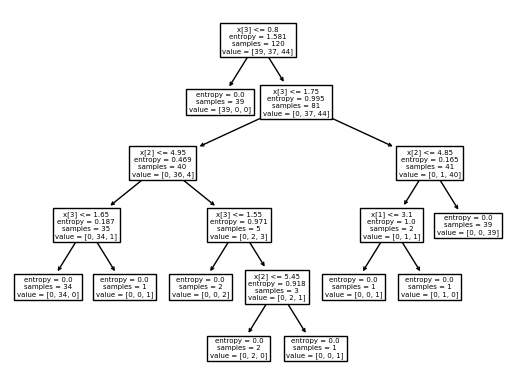

In [156]:
from sklearn.tree import plot_tree
plot_tree(classifier)

In [85]:
print(X.shape, X_train.shape ,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [18]:
#Model training
#loading the linear regression model


In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [35]:
import numpy as np
X = np.array([[1], [2], [3], [4], [5]])  # Features
Y = np.array([1, 2, 3, 4, 5])            # Target variable
X_train=X
Y_train=Y
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#prediction on training data


In [43]:
training_data_prediction= regressor.predict(X_train)

In [49]:
from sklearn import metrics
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ',r2_train)

R squared value :  1.0


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Example feature and target data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 3, 4, 5])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions on the test set
test_data_prediction = regressor.predict(X_test)

# Output the predictions
print("Predictions on test data:", test_data_prediction)


Predictions on test data: [2.]


In [83]:
r2_train = metrics.r2_score(y_test, training_data_prediction)
print('R squared value : ',r2_train)

R squared value :  nan


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [2]:
from sklearn import metrics  # Make sure this is included

# Compute R-squared for test data
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared value:', r2_test)


R squared value: nan


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [3]:
train_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(y_train, train_data_prediction)
print('Training R squared value:', r2_train)


Training R squared value: 1.0


In [85]:
#value calculation

In [101]:
input_data = (31, 1, 25.74, 0, 1, 0)
# Changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array to have only one feature
# Here we select the first feature (31) for prediction
input_data_reshaped = input_data_as_numpy_array[0].reshape(1, -1)  # Reshape to 1 row, 1 column

# Make prediction
prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ',prediction[0])


[31.]
The insurance cost is USD  30.999999999999993
